In [2]:
from sklearn.datasets import load_wine
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import NMF
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

wine = load_wine()
X = pd.DataFrame(wine.data, columns=wine.feature_names)

print("Original Shape:", X.shape)

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

nmf = NMF(n_components=5, random_state=42)
W = nmf.fit_transform(X_scaled) 
H = nmf.components_             

nmf_df = pd.DataFrame(W, columns=[f'NMF{i+1}' for i in range(5)])
print("\nReduced Shape (NMF Components):", nmf_df.shape)

Original Shape: (178, 13)

Reduced Shape (NMF Components): (178, 5)


c:\Users\Bluepal\anaconda3\envs\python_course\Lib\site-packages\sklearn\decomposition\_nmf.py:1728: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


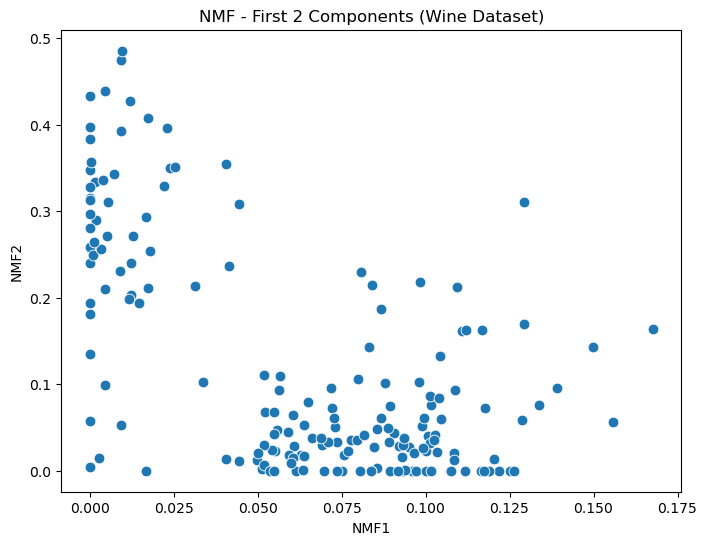

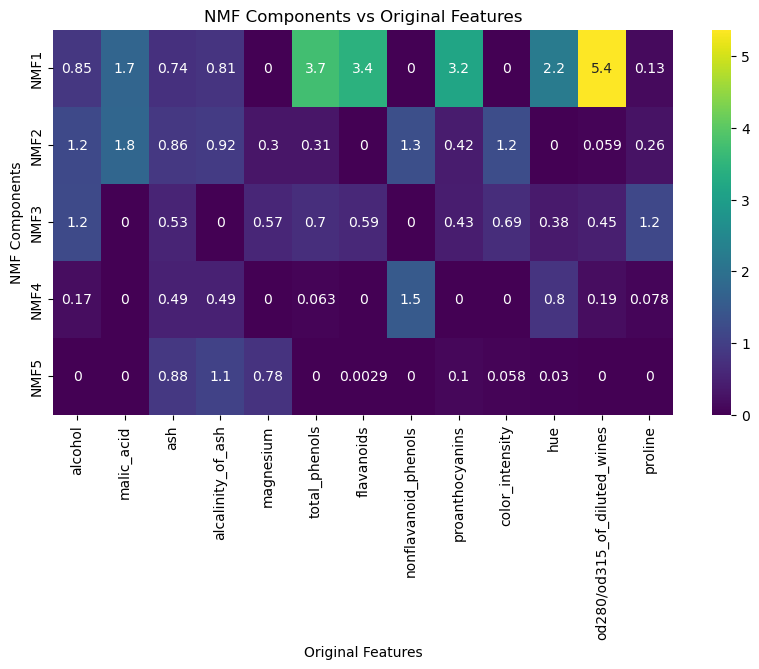

In [3]:
plt.figure(figsize=(8,6))
sns.scatterplot(
    x=nmf_df['NMF1'],
    y=nmf_df['NMF2'],
    s=60
)
plt.title('NMF - First 2 Components (Wine Dataset)')
plt.xlabel('NMF1')
plt.ylabel('NMF2')
plt.show()

plt.figure(figsize=(10,5))
sns.heatmap(H, annot=True, cmap='viridis', xticklabels=wine.feature_names, yticklabels=[f'NMF{i+1}' for i in range(5)])
plt.title('NMF Components vs Original Features')
plt.xlabel('Original Features')
plt.ylabel('NMF Components')
plt.show()